In [ ]:
#!pip install git+https://github.com/kevwilhelm95/pyCfS.git

In [1]:
from pyCfS import Combine, GoldStandards
import pandas as pd

# Combine

In [12]:
# Load files
eaml = pd.read_csv("/Users/Kevin/Library/CloudStorage/Dropbox/Kevin Only Documents/Baylor College of Medicine - Year 1/Rotation #1 - Olivier Lichtarge/UKBiobank_Analyses/Type 2 Diabetes/Runs/v5_BigPipeline_Mu_PyCFS/AgeSexBMI_Match_23Train/IMSB_3ML_Resources/Method_AllPVal/EAML_AF_1-0.005/EAML_output/meanMCC-results.nonzero-stats.rankings", sep = ',')
epi = pd.read_csv("/Users/Kevin/Library/CloudStorage/Dropbox/Kevin Only Documents/Baylor College of Medicine - Year 1/Rotation #1 - Olivier Lichtarge/UKBiobank_Analyses/Type 2 Diabetes/Runs/v5_BigPipeline_Mu_PyCFS/AgeSexBMI_Match_23Train/IMSB_3ML_Resources/Method_AllPVal/EPIMUTESTR_output/EPI_output.tsv", sep = '\t', header = None, names = ['gene', 'pvalue', 'qvalue'])
gene_embed = pd.read_csv("/Users/Kevin/Library/CloudStorage/Dropbox/Kevin Only Documents/Baylor College of Medicine - Year 1/Rotation #1 - Olivier Lichtarge/UKBiobank_Analyses/Type 2 Diabetes/Runs/v5_BigPipeline_Mu_PyCFS/AgeSexBMI_Match_23Train/IMSB_3ML_Resources/Method_AllPVal/EAWavelet_output/wavelet_output.csv", sep = ',')
savepath = "/Users/Kevin/Library/CloudStorage/Dropbox/Kevin Only Documents/Baylor College of Medicine - Year 1/Rotation #1 - Olivier Lichtarge/UKBiobank_Analyses/Genomics CFS Scripts/pyCFS Package/pyCFS_project/Examples/FunctionalConsensus_Clustering/"
print(f"EAML: {eaml.columns}")
print(f"EPI: {epi.columns}")
print(f"Gene Embed: {gene_embed.columns}")

EAML: Index(['gene', 'MCC', 'std', 'logMCC', 'zscore', 'pvalue', 'qvalue'], dtype='object')
EPI: Index(['gene', 'pvalue', 'qvalue'], dtype='object')
Gene Embed: Index(['distance', 'gene', 'z', 'p', 'fdr'], dtype='object')


       gene  occurrences                lists
0   SLC30A8            3  eaml,epi,gene_embed
9      RRP1            3  eaml,epi,gene_embed
94    TGFB1            3  eaml,epi,gene_embed
48     TP53            3  eaml,epi,gene_embed
47   HIVEP1            3  eaml,epi,gene_embed


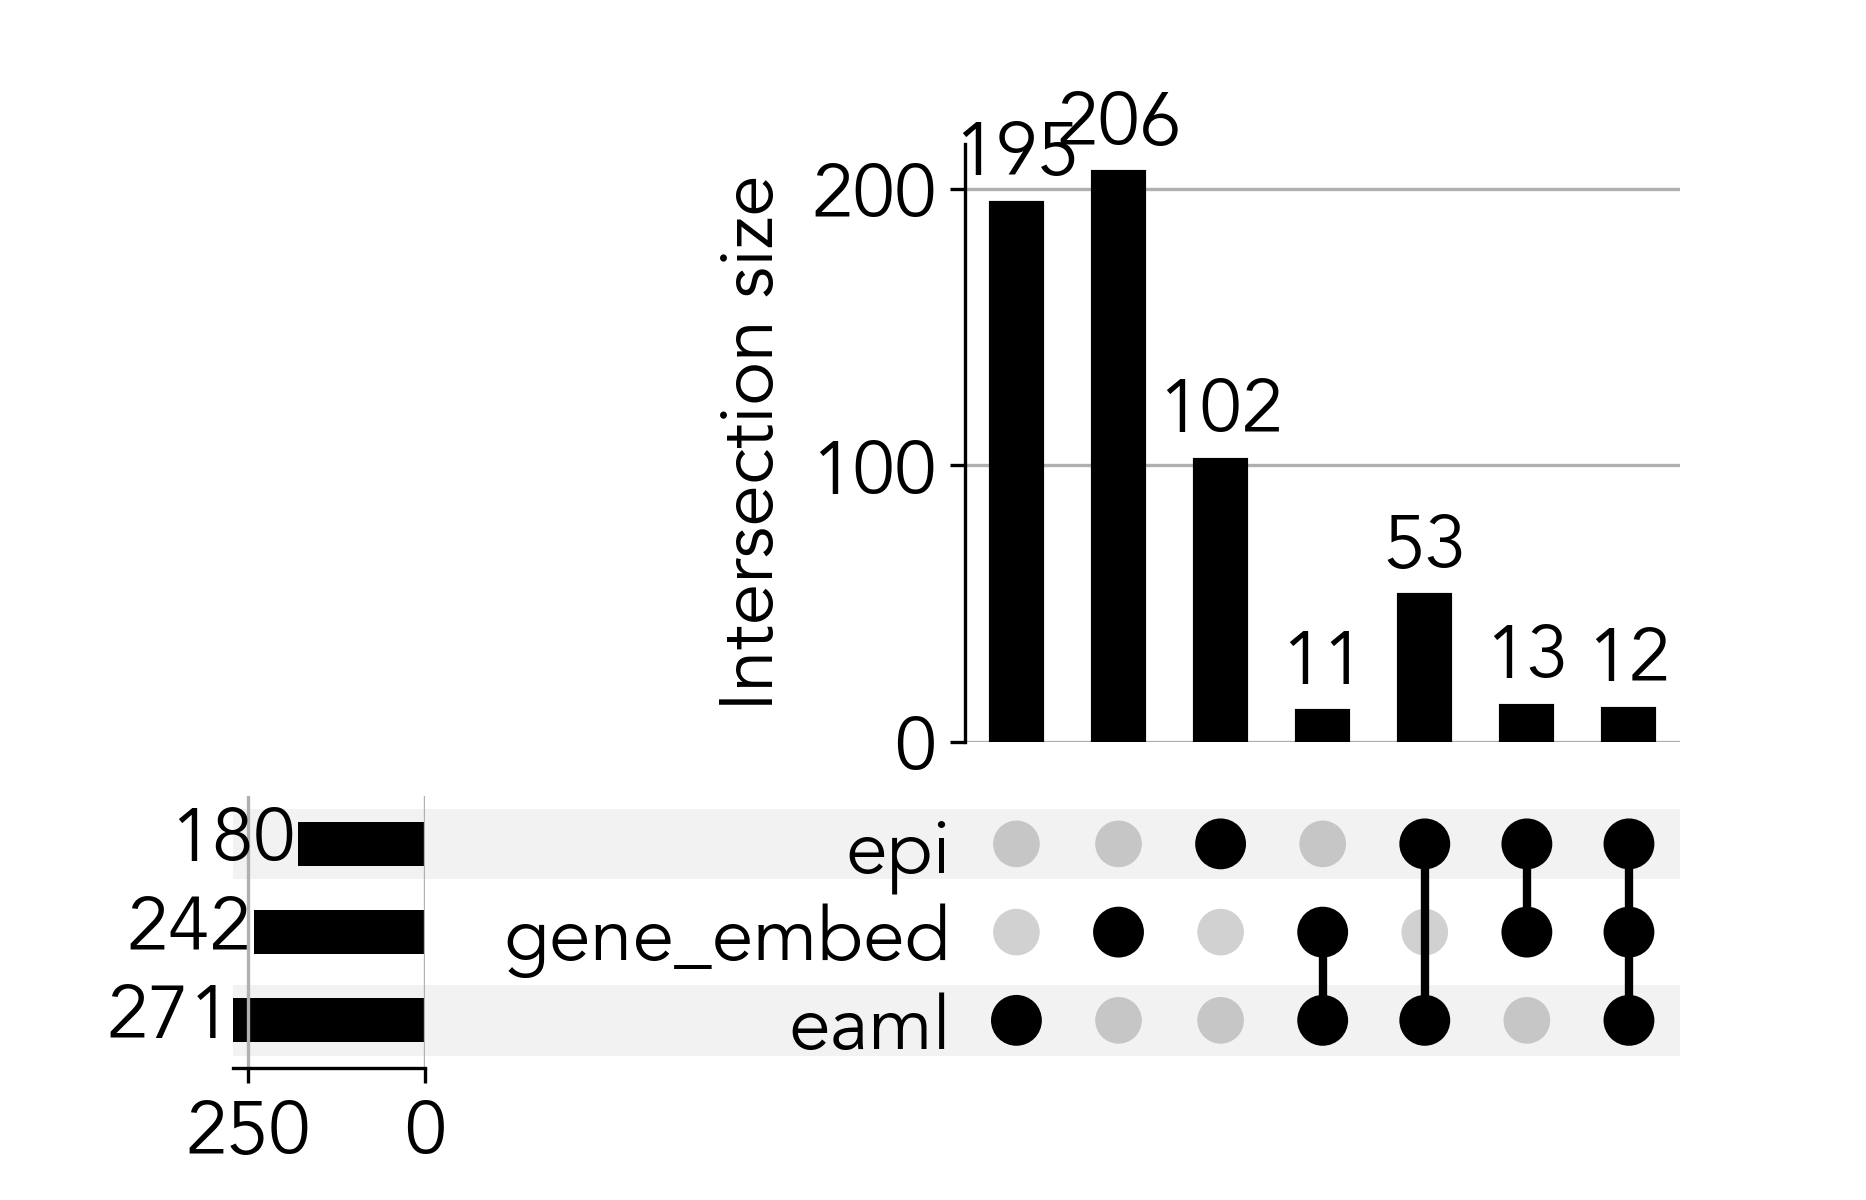

In [13]:
# Consensus
eaml_filt = eaml.gene[eaml.qvalue <= 0.1].dropna().tolist()
epi_filt = epi.gene[epi.qvalue <= 0.1].dropna().tolist()
gene_embed_filt = gene_embed.gene[gene_embed.fdr <= 0.1].dropna().tolist()

combination_df, upset_plot = Combine.consensus(
    genes_1 = eaml_filt,
    genes_2 = epi_filt,
    genes_3 = gene_embed_filt,
    list_names = ['eaml', 'epi', 'gene_embed'],
    plot_fontsize = 18
)
print(combination_df.head(5))
upset_plot

In [15]:
# Functional Clustering
eaml_filt = eaml.gene[eaml.qvalue <= 0.1].dropna().tolist()
epi_filt = epi.gene[epi.qvalue <= 0.1].dropna().tolist()
gene_embed_filt = gene_embed.gene[gene_embed.fdr <= 0.1].dropna().tolist()

if __name__ == "__main__":    
    true_gene_network, true_cluster_df, true_clusters_enrichment_df_dict = Combine.functional_clustering(
        genes_1 = eaml_filt,
        genes_2 = gene_embed_filt,
        genes_3 = epi_filt,
        source_names = ['eaml', 'gene_embed', 'epi'],
        evidences = ['all'],
        edge_confidence = 'highest',
        random_iter = 4,
        #inflation = 3.2,
        cores = 3#,
        #savepath = lichtarge_savepath
    )

print(true_gene_network.head(5))
print(true_cluster_df.head(5))
print(true_clusters_enrichment_df_dict['cluster_1']['reactome'])

FileNotFoundError: [Errno 2] No such file or directory: '/Users/Kevin/opt/anaconda3/envs/pyCfS_dev/lib/python3.8/site-packages/pyCfS/data/ReactomePathways_Mar2023.gmt'

In [19]:
# Statistical combo
eaml_p = eaml[['gene', 'pvalue']]
epi_p = epi[['gene', 'pvalue']]
gene_embed_p = gene_embed[['gene', 'p']]

consensus = Combine.statistical_combination(df_1 = eaml_p, df_2 = epi_p, df_3 = gene_embed_p)
consensus.head(3)

,gene,p_1,p_2,p_3,p.cauchy,p.min,p.mcm,p.cmc,p.multiply
0,SLC30A8,4.499715e-19,1.372028e-30,0.000138,0.000000,1.372028e-30,0.000000,0.000000e+00,8.504458e-53
1,FHOD1,6.110000e-07,8.137012e-04,0.074240,0.000002,6.110000e-07,0.000001,9.163261e-07,3.690991e-11
2,ITM2C,1.196934e-06,2.348293e-02,0.987759,0.000004,1.196934e-06,0.000002,1.795422e-06,2.776345e-08


# GoldStandard

In [2]:
# Load genelists
cauchy = pd.read_csv('/Users/Kevin/Library/CloudStorage/Dropbox/Kevin Only Documents/Baylor College of Medicine - Year 1/Rotation #1 - Olivier Lichtarge/UKBiobank_Analyses/Type 2 Diabetes/Runs/v5_BigPipeline_Mu_PyCFS/AgeSexBMI_Match_23Train/IMSB_3ML_Resources/GeneLists/StatisticalCombo/StatComboLists/Cauchy/v5_T2D_3Method_Cauchey_p<1.e-04.txt', header = None, names = ['Gene'])
gs = pd.read_csv('/Users/Kevin/Library/CloudStorage/Dropbox/Kevin Only Documents/Baylor College of Medicine - Year 1/Rotation #1 - Olivier Lichtarge/UKBiobank_Analyses/Type 2 Diabetes/GoldStandards/Individual Lists/OpenTargetPlatform_07.24.23/OpenTargets_Score>0.6_Genetics>0.6_GenomeExome/OpenTarget_Set2_2_7.27.23.txt', header = None, names = ['Gene'])
cauchy = cauchy['Gene'].tolist()
gs = gs['Gene'].tolist()
print("Cauchy: ", len(cauchy))
print("GS: ", len(gs))

Cauchy:  178
GS:  11


pval = 0.00011023520251439876
['SLC30A8', 'KCNJ11', 'ABCC8']


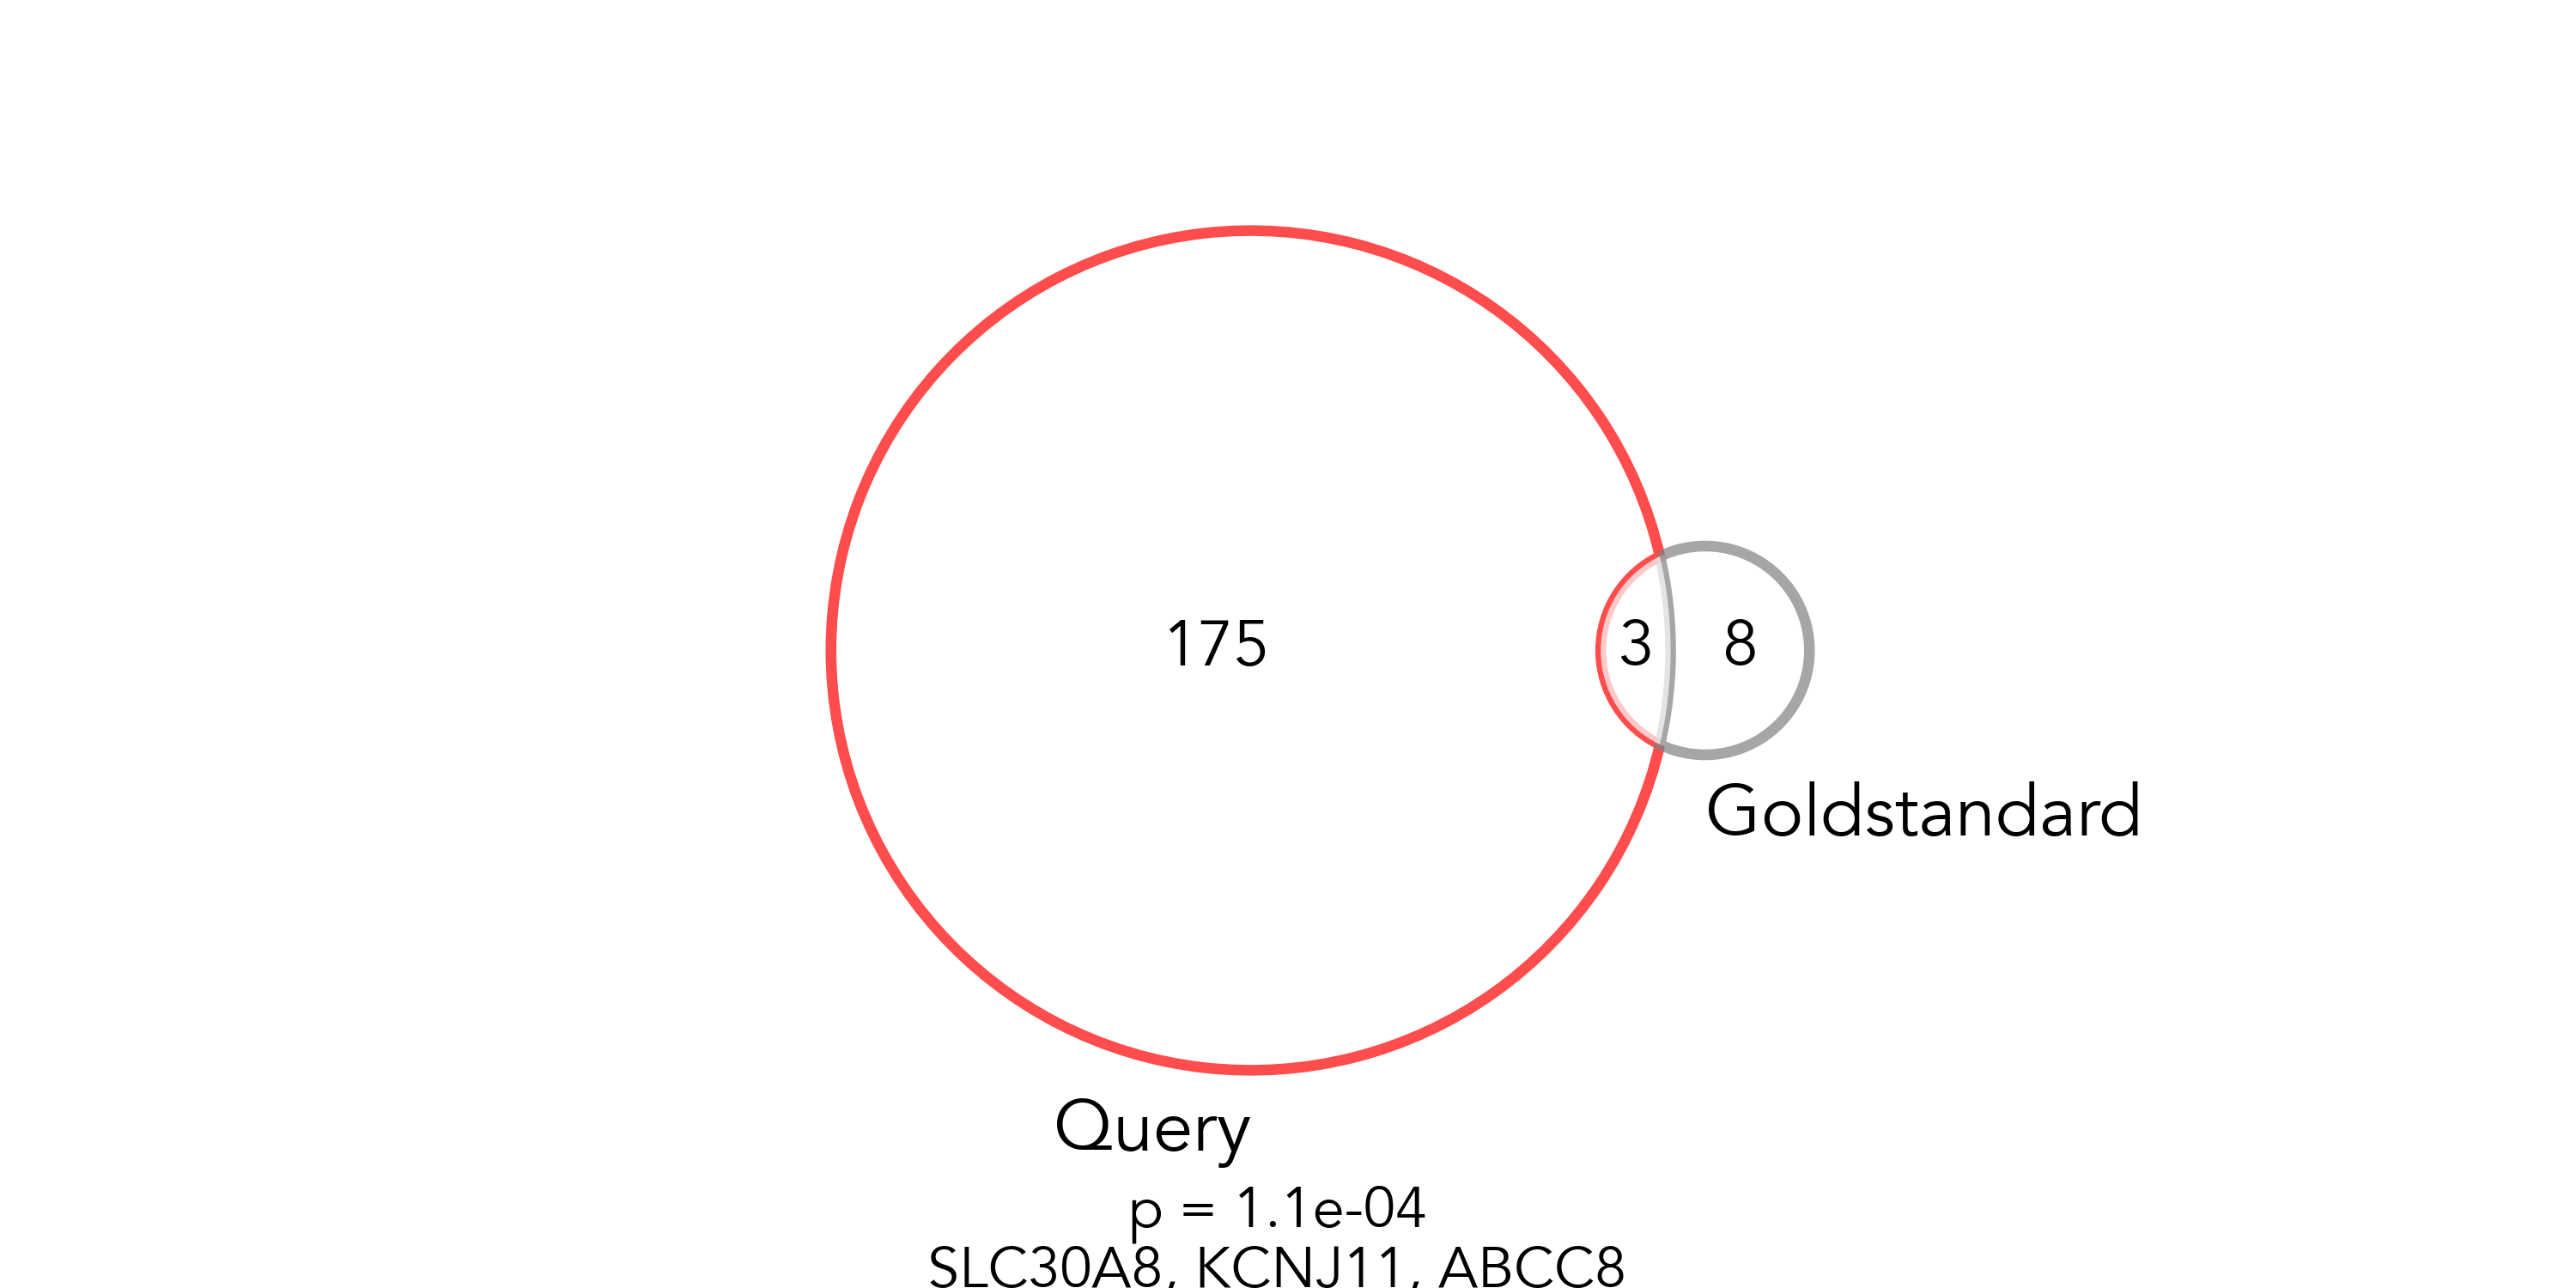

In [26]:
# GS overlap
overlapping_genes, pval, venn_diagram = GoldStandards.goldstandard_overlap(query = cauchy, goldstandard = gs, plot_fontsize = 18)
print(overlapping_genes)
venn_diagram

In [27]:
# Interconnectivity
if __name__ == '__main__':
    venn_, histo_, random_connections, connection_df, gene_sources = GoldStandards.interconnectivity(set_1 = cauchy, set_2 = gs, edge_confidence = 'highest', evidences = ['all'], num_iterations = 10, cores = 2)

print(connection_df.head(5))
histo_

NameError: name 'venn' is not defined

In [3]:
# PubMed Co-Mentions
comention_df, z_scores, image_dict = GoldStandards.pubmed_comentions(
    query = cauchy,
    keyword = "diabetes",
    enrichment_trials = 5
)
print(comention_df.head(5))
print(z_scores)
print(image_dict[(15,50)])

Pulling Publications for 5 random gene sets of 178 genes
 Random Trial : 0
       Count                           PMID for Gene + diabetes
EGFR    1944  34873433; 34824300; 35763030; 35239437; 370102...
KIT     1059  31425383; 33421511; 34850005; 34479471; 369116...
APOE    1031  33467546; 34609116; 30623143; 33938457; 360772...
NOS2     622  34294713; 37204119; 27567871; 34718103; 311886...
KCNJ11   596  32027066; 29792621; 35145023; 35893051; 264489...
{(-1, 0): (44, -8.490693304525813), (0, 5): (61, -0.9502552681394972), (5, 15): (17, 1.466426440045678), (15, 50): (20, 7.082422910679247), (50, 100000): (35, 8.31170617018308)}
dict_keys([(-1, 0), (0, 5), (5, 15), (15, 50), (50, 100000)])


In [6]:
# GWAS Catalog
if __name__ == '__main__':
    coloc_df, p = GoldStandards.gwas_catalog_colocalization(
        query = cauchy,
        mondo_id = 'MONDO_0005148',
        gwas_p_thresh = 5e-15,
        distance_mbp = 0.5,
        cores = 2
    )
print(coloc_df.head(5))
print(p)

Querying GWAS Catalog API for MONDO_0005148
Running query genes
Running background genes


KeyboardInterrupt: 